In [19]:
# pip install requests pandas plotly chart-studio python-dotenv
!pip install discover_feature_relationships

In [135]:
# TO STORE AND PROCESS DATA IN DATAFRAME
import pandas as pd
import os

# FOR NUMERICAL ANALYTICS
import numpy as np

# BASIC VISUALIZATION PACKAGE
import matplotlib.pyplot as plt

# ADVANCED PLOTING
import seaborn as sns

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# INTERACTIVE VISUALIZATION
import chart_studio.plotly as py 
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from discover_feature_relationships import discover

from pandas.plotting import scatter_matrix

import plotly.express as px
import json
import datetime

In [6]:
#2015 data
df_15 = pd.read_csv('./Data World Happiness Report/2015.csv')
#df_15.describe()
#df_15.info()
df_15['Rank'] = [i+1 for i in range(len(df_15['Country']))]
df_15
df_15.head()

,Country,Happiness Score,GDP,Social support,Health,Freedom,Generosity,id,Year,Rank
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,CHE,2015,1
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,ISL,2015,2
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,DNK,2015,3
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,NOR,2015,4
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,CAN,2015,5


In [7]:
#2016 data
df_16 = pd.read_csv('./Data World Happiness Report/2016.csv')
#df_16.describe()
#df_16.info()
df_16['Rank'] = [i+1 for i in range(len(df_16['Country']))]
df_16
df_16.head()

,Country,Happiness Score,GDP,Social support,Health,Freedom,Generosity,id,Year,Rank
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,DNK,2016,1
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,CHE,2016,2
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,ISL,2016,3
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,NOR,2016,4
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,FIN,2016,5


In [8]:
#2017 data
df_17 = pd.read_csv('./Data World Happiness Report/2017.csv')
#df_17.describe()
#df_17.info()
df_17['Rank'] = [i+1 for i in range(len(df_17['Country']))]
df_17
df_17.head()

,Country,Happiness Score,GDP,Social support,Health,Freedom,Generosity,id,Year,Rank
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,NOR,2017,1
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,DNK,2017,2
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,ISL,2017,3
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,CHE,2017,4
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,FIN,2017,5


In [9]:
#2018 data
df_18 = pd.read_csv('./Data World Happiness Report/2018.csv')
#df_18.describe()
#df_18.info()
df_18['Rank'] = [i+1 for i in range(len(df_18['Country']))]
df_18
df_18.head()

,Country,Happiness Score,GDP,Social support,Health,Freedom,Generosity,id,Year,Rank
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,FIN,2018,1
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,NOR,2018,2
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,DNK,2018,3
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,ISL,2018,4
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,CHE,2018,5


In [10]:
#2019 data
df_19 = pd.read_csv('./Data World Happiness Report/2019.csv')
#df_19.describe()
#df_19.info()
df_19['Rank'] = [i+1 for i in range(len(df_19['Country']))]
df_19
df_19.head()

,Country,Happiness Score,GDP,Social support,Health,Freedom,Generosity,id,Year,Rank
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,FIN,2019,1
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,DNK,2019,2
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,NOR,2019,3
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,ISL,2019,4
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,NLD,2019,5


In [14]:
# APPENDING ALL TOGETHER
finaldf = df_15.append([df_16,df_17,df_18,df_19], ignore_index = True)
# finaldf.dropna(inplace = True)
#CHECKING FOR MISSING DATA
finaldf.isnull().any()
# FILLING MISSING VALUES OF CORRUPTION PERCEPTION WITH ITS MEAN
# finaldf.Corruption.fillna((finaldf.Corruption.mean()), inplace = True)
finaldf

,Country,Happiness Score,GDP,Social support,Health,Freedom,Generosity,id,Year,Rank
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,CHE,2015,1
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,ISL,2015,2
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,DNK,2015,3
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,NOR,2015,4
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,CAN,2015,5
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,RWA,2019,152
778,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,TZA,2019,153
779,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,AFG,2019,154
780,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,CAF,2019,155


In [134]:
finaldf.describe()

,Happiness Score,GDP,Social support,Health,Freedom,Generosity,Year,Rank
count,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00
mean,5.38,0.92,1.08,0.61,0.41,0.22,2016.99,78.70
std,1.13,0.41,0.33,0.25,0.15,0.12,1.42,45.18
min,2.69,0.00,0.00,0.00,0.00,0.00,2015.00,1.00
25%,4.51,0.61,0.87,0.44,0.31,0.13,2016.00,40.00
50%,5.32,0.98,1.12,0.65,0.43,0.20,2017.00,79.00
75%,6.19,1.24,1.33,0.81,0.53,0.28,2018.00,118.00
max,7.77,2.10,1.64,1.14,0.72,0.84,2019.00,158.00


[None, None, None, None, None, None]

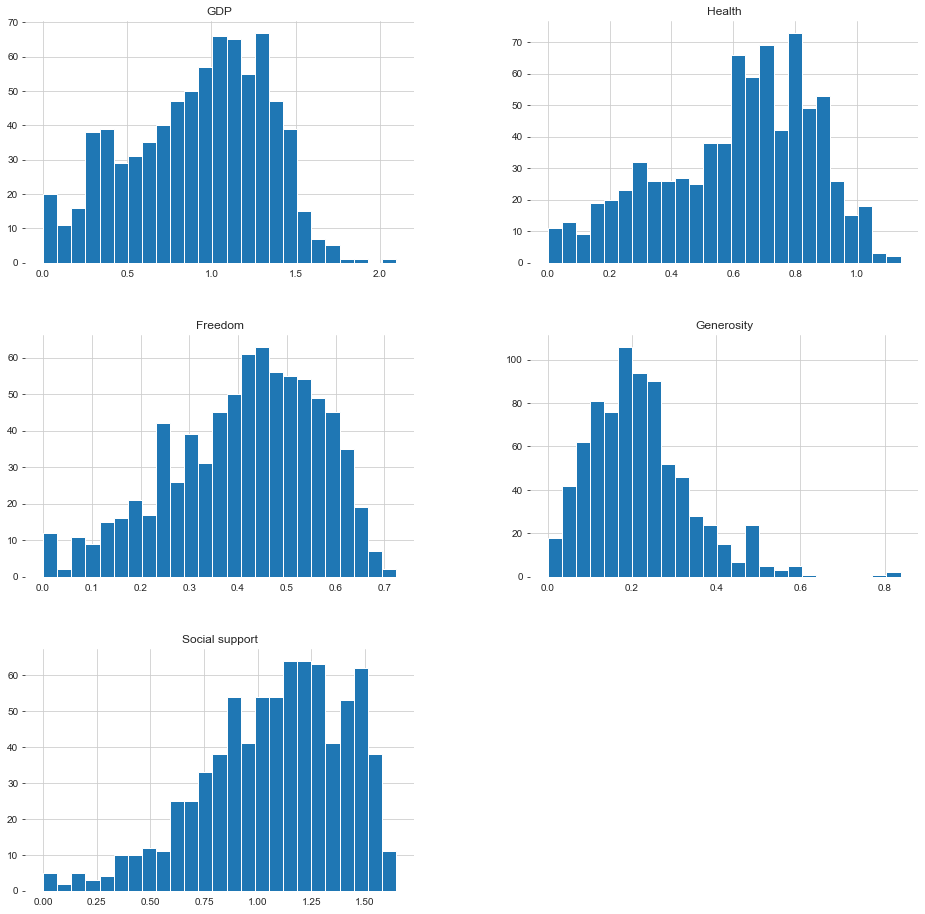

In [126]:
# DISTRIBUTION OF ALL NUMERIC DATA
plt.rcParams['figure.figsize'] = (15, 15)
df1 = finaldf[['GDP', 'Health', 'Freedom',
              'Generosity','Social support']]
h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10')
seabornInstance.despine(left = True, bottom = True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()]

In [182]:
'''World Map
Happiness Rank Accross the World'''
def wmap(dt, column):
    happiness_rank = dict(type = 'choropleth', 
               locations = dt['Country'],
               locationmode = 'country names',
               z = dt[column], 
               text = dt['Country'],
               colorscale = 'plasma_r',
               autocolorscale=False,
               reversescale=True,
               marker_line_color='darkgray',
               marker_line_width=0.5)
    layout = dict(title = 'Happiness Rank Across the World', 
                 geo = dict(showframe = False, 
                           projection = {'type': 'equirectangular'}))
    world_map_1 = go.Figure(data = [happiness_rank], layout=layout)
    iplot(world_map_1)

In [183]:
wmap(df_19,'Freedom')

In [143]:
def subset(data, country_name):
    subset = data.loc[data['Country'] == country_name]
    return subset

In [144]:
subset(finaldf,'Vietnam')

,Country,Happiness Score,GDP,Social support,Health,Freedom,Generosity,id,Year,Rank
74,Vietnam,5.360,0.632160,0.912260,0.746760,0.594440,0.168600,VNM,2015,75
253,Vietnam,5.061,0.740370,0.791170,0.661570,0.559540,0.250750,VNM,2016,96
408,Vietnam,5.074,0.788548,1.277491,0.652169,0.571056,0.234968,VNM,2017,94
564,Vietnam,5.103,0.715000,1.365000,0.702000,0.618000,0.177000,VNM,2018,95
719,Vietnam,5.175,0.741000,1.346000,0.851000,0.543000,0.147000,VNM,2019,94


In [85]:
def chart(country_list, oy, oz):
    
    for country_name in country_list:
            if country_name in finaldf['Country'].values:
                fig, ax1 = plt.subplots(figsize=(10, 5))
                ax2 = ax1.twinx()

                country = subset(finaldf, country_name)
                x = country['Year']
                y = country[oy]
                z = country[oz]

                ax1.plot(x, y,'r', label=oy)
                ax2.plot(x, z,'b', label=oz)

                ax1.set_xlabel('Year')
                ax1.set_ylabel(oy)
                ax2.set_ylabel(oz)
                ax1.set_title(country_name)
                ax1.legend(loc = 1)
                ax2.legend(loc = 2)

                #     chart(country, thing, 'GDP')
                plt.show()
            else :
                print("There is no country named", country_name,"in the Data")

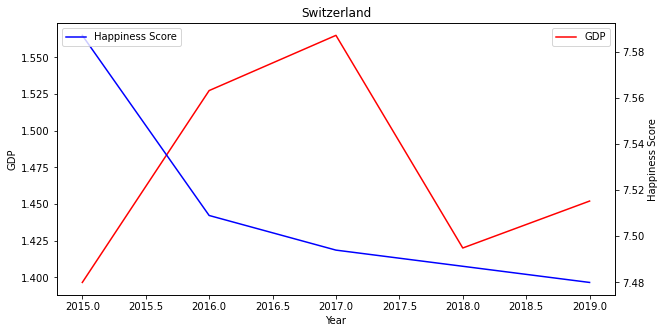

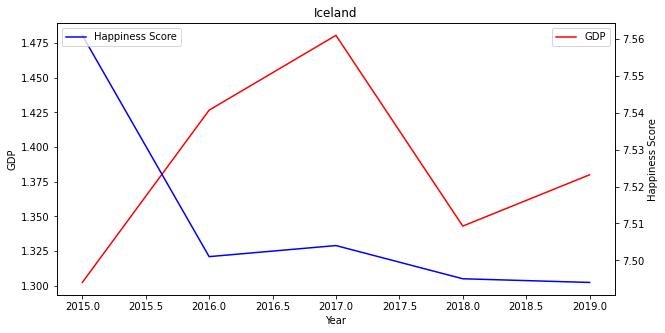

There is no country named yen in the Data


In [87]:
chart(['Switzerland', 'Iceland', 'yen'], 'GDP', 'Happiness Score')

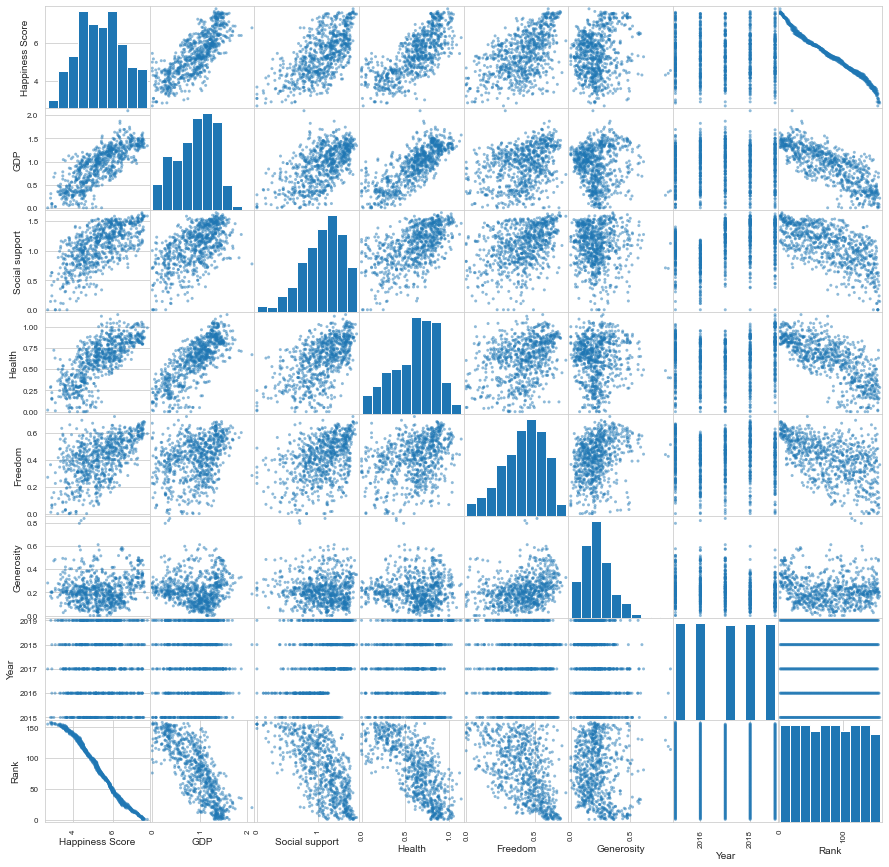

In [220]:

scatter_matrix(finaldf, figsize  = [15, 15])

plt.show()



In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

x_train = finaldf[['Health','GDP']][:401]
x_train

y_train = finaldf['Happiness Score'][:401]
y_train

x_test = subset(finaldf, 'Vietnam')[['Health','GDP']]
y_test = subset(finaldf, 'Vietnam')['Happiness Score']


In [185]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [186]:
y_pre = model.predict(x_test)
y_pre
explained_variance_score(y_pre, y_test)

-1.2010163271348397

In [187]:
y_test = pd.DataFrame(y_test)
y_test['Year'] = subset(finaldf, 'Vietnam')['Year']
y_test['Prediction'] = y_pre
y_test

,Happiness Score,Year,Prediction
74,5.360,2015,5.230280
253,5.061,2016,5.266087
408,5.074,2017,5.324142
564,5.103,2018,5.287891
719,5.175,2019,5.546668


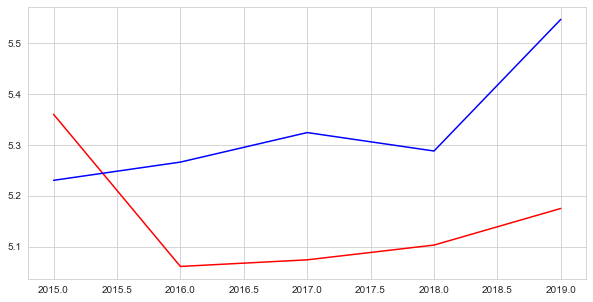

In [188]:
plt.figure(figsize=(10, 5))

plt.plot(y_test['Year'], y_test['Happiness Score'],'r')
plt.plot(y_test['Year'], y_test['Prediction'],'b')

plt.show()